# **GUIA DE LABORATORIO **

## **APELLIDOS, Nombres:** AQUINO CURISINCHE, Harold Jhonatan
**Fecha:** Sábado 25 de Mayo del 2024-1 Tec

# STANDARD LIBRARIES:

Importamos las librerias necesarias para la visualización de gráficos

In [1]:
import pandas as pd
pd.Timestamp.today().strftime('%Y-%m-%d %H:%M:%S') # Se capta la fecha y hora actual

'2024-06-16 16:21:29'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from matplotlib import style
plt.style.use('ggplot')
#plt.style.use('seaborn-darkgrid')
#plt.style.use('fivethirtyeight')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5
plt.rcParams['axes.facecolor'] = 'white'

In [4]:
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# CUSTOMIZED LIBRARIES:

Se importa la clase SVC para el entrenamiento de máquinas de vectores de soporte, luego el accuray score para evaluar el rendimiento de un modelo de clasificación, por último el yfinance para descargar los datos financieros históricos.

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [9]:
import yfinance as yf
yf

<module 'yfinance' from 'C:\\Users\\harol\\anaconda3\\Lib\\site-packages\\yfinance\\__init__.py'>

# EXTRACCION DE DATOS:

Se establece una fecha de inicio y una fecha de inicialización para la visualización de los precios y se procede a descargar los datos financieros, en este caso se descargo de FSM (Fortuna Silver Mines).

In [10]:
start_date='2020-01-01'
end_date='2023-12-31'

In [11]:
df = yf.download('BHP', start_date, end_date)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,49.259590,49.304192,48.867085,48.991970,41.455849,1382193
2020-01-03,48.385368,48.911686,48.349689,48.661907,41.176552,1208438
2020-01-06,48.519180,48.706512,48.501339,48.608383,41.131268,771584
2020-01-07,48.438892,48.795719,48.429974,48.608383,41.131268,1014393
2020-01-08,48.795719,49.063335,48.706512,48.849243,41.335075,1317848
...,...,...,...,...,...,...
2023-12-22,68.000000,68.169998,67.669998,67.820000,66.152298,1896800
2023-12-26,68.000000,68.449997,67.959999,68.220001,66.542465,1390200
2023-12-27,68.239998,68.989998,68.230003,68.889999,67.195984,2339200


In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,55.894084,56.406545,55.375490,55.936302,50.827593,3.252849e+06
std,8.988175,9.036764,8.952654,9.030858,9.003104,1.755506e+06
min,27.448708,28.483498,26.565565,27.591436,24.029583,6.951320e+05
25%,49.259590,49.734613,48.777876,49.275001,43.825513,2.195674e+06
50%,57.545000,58.067114,57.152702,57.693703,53.218954,2.796951e+06
75%,62.395001,62.900002,61.903062,62.382500,57.692250,3.762441e+06
max,72.720787,73.211418,72.033897,72.256912,67.587669,1.353843e+07


In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,49.259590,49.304192,48.867085,48.991970,41.455849,1382193
2020-01-03,48.385368,48.911686,48.349689,48.661907,41.176552,1208438
2020-01-06,48.519180,48.706512,48.501339,48.608383,41.131268,771584
2020-01-07,48.438892,48.795719,48.429974,48.608383,41.131268,1014393
2020-01-08,48.795719,49.063335,48.706512,48.849243,41.335075,1317848


In [14]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,68.000000,68.169998,67.669998,67.820000,66.152298,1896800
2023-12-26,68.000000,68.449997,67.959999,68.220001,66.542465,1390200
2023-12-27,68.239998,68.989998,68.230003,68.889999,67.195984,2339200
2023-12-28,68.839996,69.110001,68.580002,68.620003,66.932625,1949500
2023-12-29,68.330002,68.550003,68.010002,68.309998,66.630249,1555200


In [15]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1006 non-null   float64
 1   High       1006 non-null   float64
 2   Low        1006 non-null   float64
 3   Close      1006 non-null   float64
 4   Adj Close  1006 non-null   float64
 5   Volume     1006 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.0 KB


None

In [ ]:
# Matriz de correlación con todas las variables y visualización
correlation_matrix = df.corr()
print(correlation_matrix)

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Todas las Variables')
plt.show()

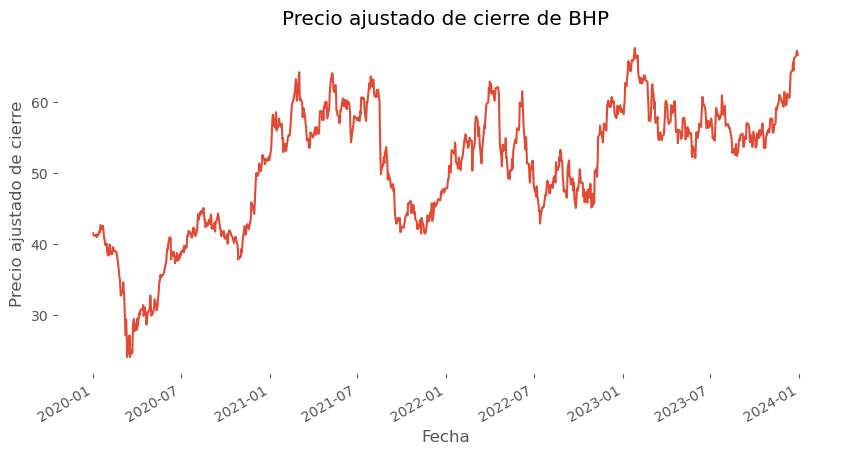

In [16]:
# 1. Gráfico del precio (Closing Price vs Time)
df['Adj Close'].plot(title='Precio ajustado de cierre de BHP')
plt.xlabel('Fecha')
plt.ylabel('Precio ajustado de cierre')
plt.show()

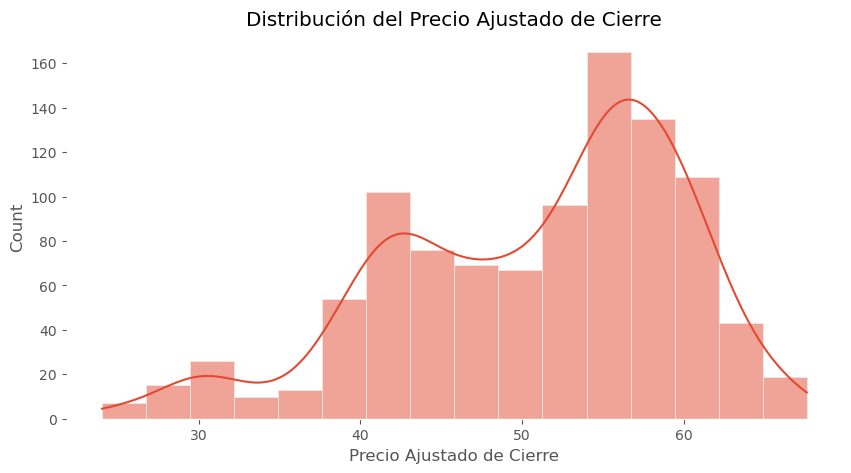

In [17]:
# 2. Visualización de la distribución del precio
sns.histplot(df['Adj Close'], kde=True)
plt.title('Distribución del Precio Ajustado de Cierre')
plt.xlabel('Precio Ajustado de Cierre')
plt.show()

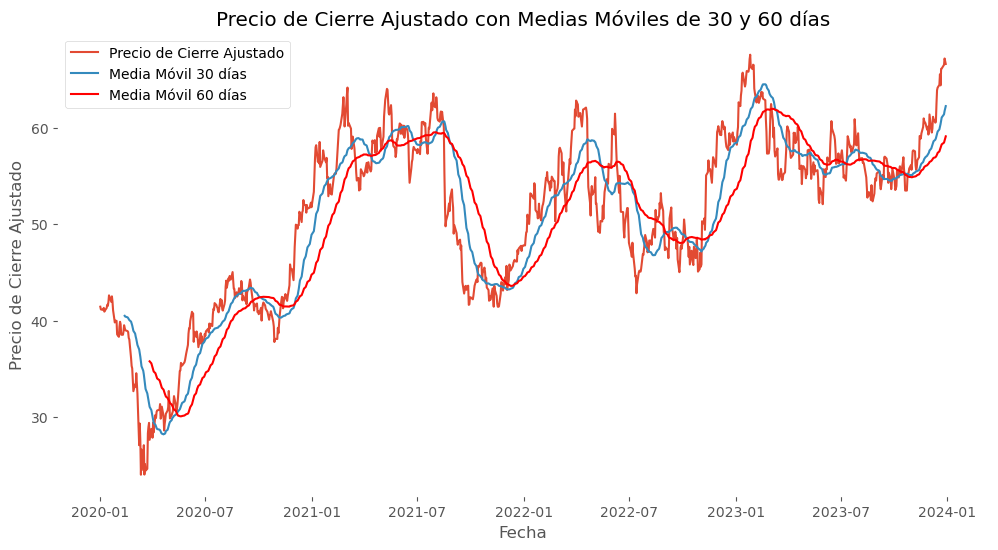

In [18]:
# 3. Gráfico de precio con medias móviles de 30 y 60 días
df['30MA'] = df['Adj Close'].rolling(window=30).mean()
df['60MA'] = df['Adj Close'].rolling(window=60).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Adj Close'], label='Precio de Cierre Ajustado')
plt.plot(df['30MA'], label='Media Móvil 30 días')
plt.plot(df['60MA'], label='Media Móvil 60 días', color='red')
plt.title('Precio de Cierre Ajustado con Medias Móviles de 30 y 60 días')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado')
plt.legend()
plt.show()

In [19]:
# Preparar datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Adj Close'].values.reshape(-1, 1))

In [20]:
# Crear secuencias para LSTM
def create_sequences(df, seq_length):
    sequences = []
    labels = []
    for i in range(len(df) - seq_length):
        sequences.append(df[i:i+seq_length])
        labels.append(df[i+seq_length])
    return np.array(sequences), np.array(labels)

In [21]:
seq_length = 60  # Usaremos 60 días anteriores para predecir el siguiente día
X, y = create_sequences(scaled_data, seq_length)

In [22]:
# Dividir los datos en entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [23]:
# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [24]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
# Entrenar el modelo
model.fit(X_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - loss: 0.0130
Epoch 2/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - loss: 0.0025
Epoch 3/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - loss: 0.0018
Epoch 4/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 0.0014
Epoch 5/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - loss: 0.0011
Epoch 6/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - loss: 0.0014
Epoch 7/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 0.0010
Epoch 8/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - loss: 0.0013
Epoch 9/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - loss: 9.2795e-04
Epoch 10/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - loss: 0.0011
Epoch 11/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - loss: 0.0011
Epoch 12/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - loss: 8.5780e-04
Epoch 13/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - loss: 0.0011
Epoch 14/20
756/756 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - loss: 9.4423e-04
Epoch 15/20
756/7

In [26]:
# Hacer predicciones
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Desescalar los datos

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step


In [27]:
# Evaluar el modelo
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 3158.44
Root Mean Squared Error: 56.20
Mean Absolute Error: 56.13


In [28]:
# Crear un DataFrame con los resultados
results = pd.DataFrame({'Actual': scaler.inverse_transform(y_test.reshape(-1, 1)).flatten(), 'Predicted': predictions.flatten()})

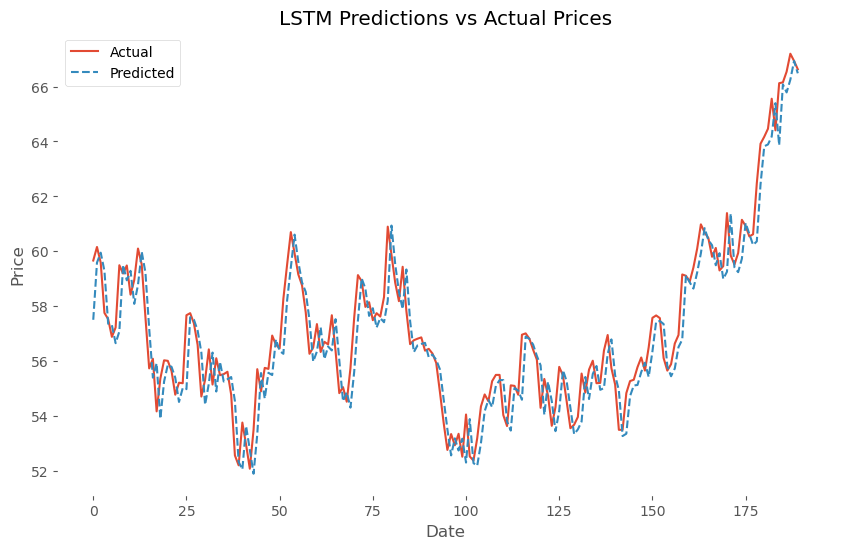

In [29]:
# Ploteo de los resultados
plt.figure(figsize=(10, 6))
plt.plot(results['Actual'], label='Actual')
plt.plot(results['Predicted'], label='Predicted', linestyle='--')
plt.legend()
plt.title('LSTM Predictions vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [30]:
# Predicción para el siguiente día
last_sequence = scaled_data[-seq_length:]
last_sequence = last_sequence.reshape((1, seq_length, 1))
next_day_prediction = model.predict(last_sequence)
next_day_prediction = scaler.inverse_transform(next_day_prediction)
print(f"El precio de BHP se pronóstica según el modelo LSTM para el siguiente día como: ${next_day_prediction[0][0]:.2f} por acción.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
El precio de BHP se pronóstica según el modelo LSTM para el siguiente día como: $66.18 por acción.
